In [1]:
#Procedo a importar la librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

warnings.filterwarnings("ignore")


In [2]:
# procedo a importar los dataset escojidos

#https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
# Dadaset para regresion lineal Simple
train = pd.read_csv('./train.csv')

# https://www.kaggle.com/datasets/kandij/diabetes-dataset
# Dadaset para regresion Logistica
diabetes = pd.read_csv('./diabetes.csv')

In [3]:
# ver los encabezados del dataset
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#ver el dataser train con todas sus columnas
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Para la regresion lineal simple utilizaremos la variables 'GrLivArea' para x y 'SalePrice' para y
train[['GrLivArea','SalePrice']].head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


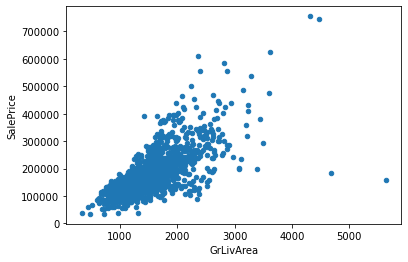

In [6]:
# grafico de dispersion con la variable x, y
train.plot.scatter (x='GrLivArea',y ='SalePrice')
plt.show()

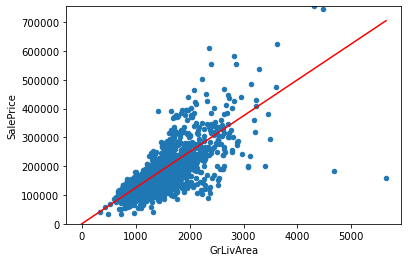

In [7]:
#Grafico la recta para lo cual tomo los parametro
w = 125
b = 0

#puntos de la recta

x = np.linspace(0,train['GrLivArea'].max(),100)
y = w*x+b

#grafica de dispersion con la recta

train.plot.scatter(x='GrLivArea', y='SalePrice')
plt.plot(x, y, '-r')
plt.ylim(0,train['SalePrice'].max())
plt.show()


In [8]:
# para estimar el valor utilizare prediciones
#Calculo de predicciones

train['pred']= train ['GrLivArea']*w+b


In [9]:
#caclulo de la funcion de error
train['diff'] = train['pred']-train['SalePrice']
train['cuad'] = train['diff'] **2
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,213750,5250,27562500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,157750,-23750,564062500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,223250,-250,62500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,214625,74625,5568890625
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,274750,24750,612562500


In [10]:

train['cuad'].mean()

3300407822.406164

In [11]:
# podemos concluir que las prediciones obtenidas con la regresion lineal Simple
# utilizando los parametros w y b tiene un error del 3300407822.406164

In [12]:
#Regresion logistica
#Variable de interes son:
#EL año que mas ventas presenta

diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:

#índice de masa corporal. Es una métrica o KPI basada en el peso y la altura de cada persona.
#Un BMI muy alto puede ser indicativo de tener diabetes
#Outcome: si la persona tiene diabetes o no

diabetes[['BMI','Outcome']].head()



,BMI,Outcome
0,33.6,1
1,26.6,0
2,23.3,1
3,28.1,0
4,43.1,1


<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

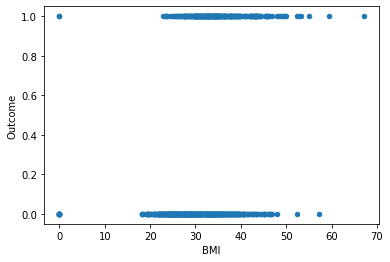

In [15]:
diabetes[['BMI','Outcome']].plot.scatter(x='BMI',y='Outcome')


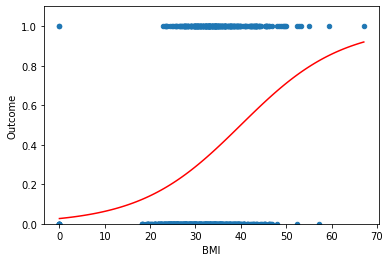

In [16]:
# voy a pintar una función logistica sobre estos datos
# pruebas de parametro
w = 0.09
b = -3.6

# puntos de la recta
x = np.linspace(0,diabetes['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
diabetes.plot.scatter(x='BMI',y='Outcome')
plt.plot(x, y, '-r')
plt.ylim(0,diabetes['Outcome'].max()*1.1)
# plt.grid()
plt.show()

In [17]:
#Optimización de parámetros w y b utilizare la siguiente estrategia

#calculo el valor de la función logística para cada dato
#calculo la función de pérdida (se denota con L o loss)
#calculo el promedio de la pérdida para obtener el costo (se denota con Jo cost)

In [26]:
# calculo de las predicciones
diabetes['sigmoid'] = 1/(1+np.exp(-(diabetes['BMI']*w+b)))


# calculo de la funcion de error
diabetes['loss_xi'] = -diabetes['Outcome']*np.log(diabetes['sigmoid'])-(1-diabetes['Outcome'])*np.log(1-diabetes['sigmoid'])
cost_j = diabetes['loss_xi'].mean()
cost_j

0.5995794663996219

In [19]:
# podemos concluir que las prediciones obtenidas con la regresion logistica 
# utilizando los parametros w y b tiene un error del 0.5995794663996219



In [20]:
#modelo Árboles de decisión y clasificación (CART)

In [21]:
categories = [ 'Glucose','BMI' ]

for category in categories:
  cat_list = "cat" + "_"+category
  cat_dummies = pd.get_dummies(diabetes[category], prefix=cat_list)
  diabetes = diabetes.join(cat_dummies)
  diabetes.columns.values

In [22]:


#Eliminamos las variables originales que se convirtieron a dummies

data_vars =  diabetes.columns.values.tolist()
to_keep = [v for v in data_vars if v not in categories]
stroke_data = diabetes[to_keep]
stroke_data.columns.values


diabetes_var=stroke_data.columns.values.tolist()
var_Y = ['Outcome']
var_X = [v for v in  diabetes_var if v not in var_Y]
y = stroke_data['Outcome']
X = stroke_data[var_X]

#Se separa en el conjunto de entrenamiento y de test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


stroke_tree = DecisionTreeClassifier(criterion="gini", min_samples_split=20, max_depth=10)
stroke_tree.fit(X_train, y_train)
varImpList= []
for name, importance in zip(var_X, stroke_tree.feature_importances_):  
    temp = [name, importance*100]
    varImpList.append(temp)
y_pred_tree = stroke_tree.predict(X_test)
importance_df = pd.DataFrame(varImpList, columns = ['Variable', 'Importancia'])
importancia_variable= importance_df.sort_values('Importancia', ascending = False)
importancia_variable.head(15)

,Variable,Importancia
5,Age,19.640274
2,SkinThickness,17.665567
3,Insulin,13.524150
4,DiabetesPedigreeFunction,10.093070
1,BloodPressure,7.028979
0,Pregnancies,4.536621
265,cat_BMI_33.6,2.661401
249,cat_BMI_31.6,1.777145
99,cat_Glucose_155,1.562442
72,cat_Glucose_128,1.494510


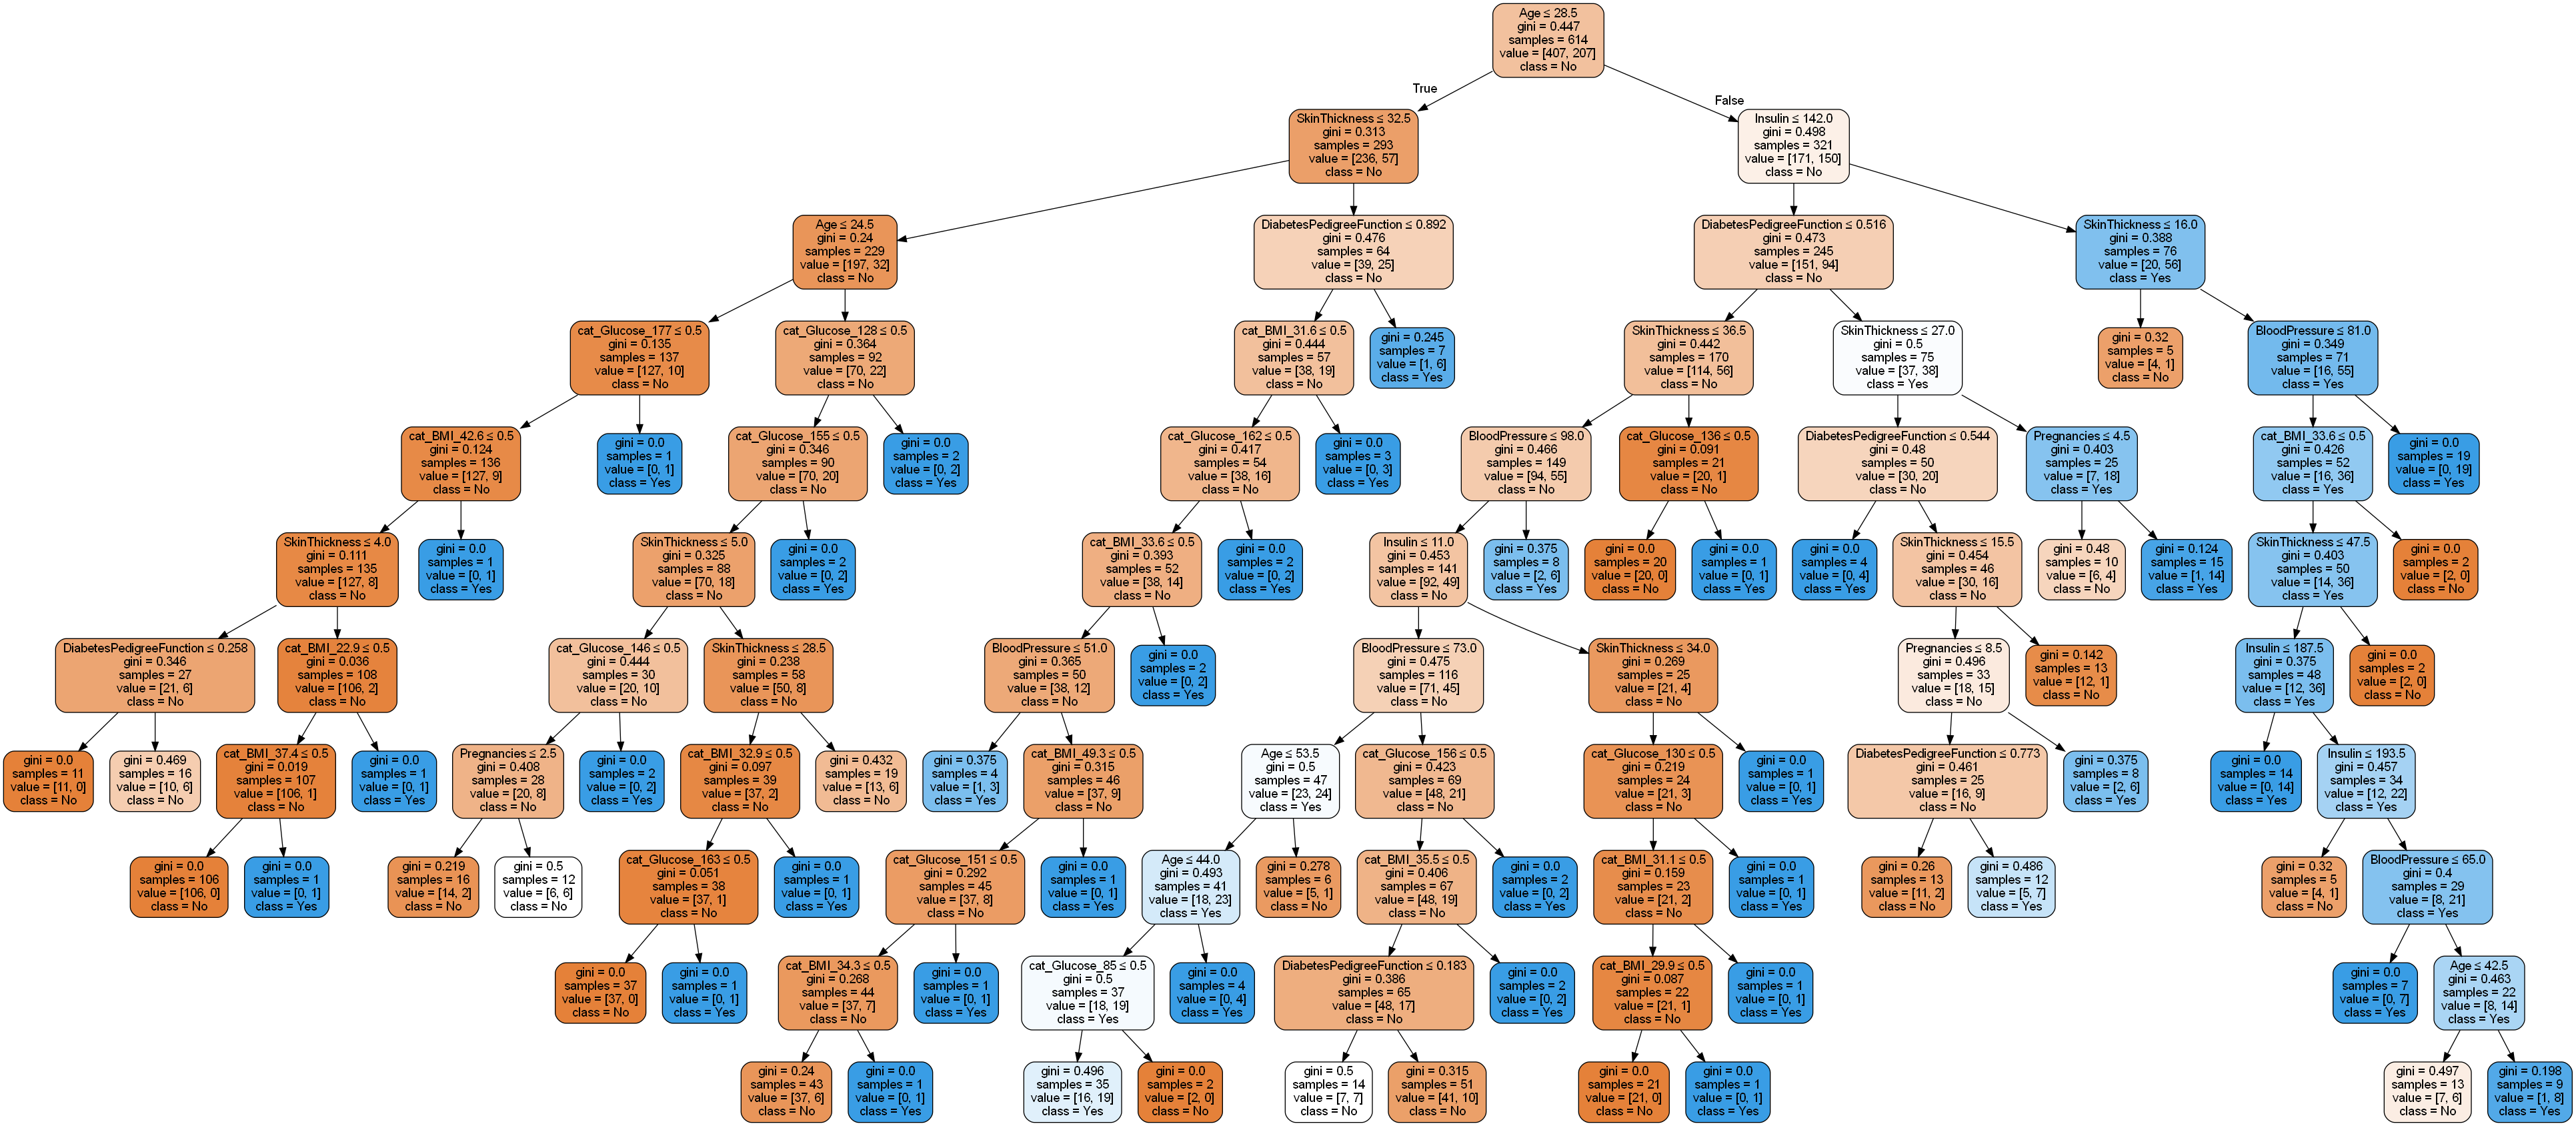

In [23]:
dot_data = StringIO()
export_graphviz(stroke_tree, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names=var_X, class_names = ['No', 'Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())